## RESNET 50

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1# Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Load model MobileNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)
model_path = 'resnet50_model.h5'
model.save(model_path)

Found 2700 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/15
169/169 [==============================] - 81s 209ms/step - loss: 0.6804 - accuracy: 0.7437 - val_loss: 2.7282 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/15
169/169 [==============================] - 36s 212ms/step - loss: 0.3011 - accuracy: 0.9004 - val_loss: 2.4179 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 3/15
169/169 [==============================] - 35s 204ms/step - loss: 0.2252 - accuracy: 0.9252 - val_loss: 1.8853 - val_accuracy: 0.2433 - lr: 1.0000e-04
Epoch 4/15
169/169 [==============================] - 37s 221ms/step - loss: 0.1586 - accuracy: 0.9515 - val_loss: 1.9846 - val_accuracy: 0.2700 - lr: 1.0000e-04
Epoch 5/15
169/169 [==============================] - 34s 198ms/step - loss: 0.1386 - accuracy: 0.9541 - val_loss: 1.7473 - val_accuracy: 0.3433 - lr: 1.0000e-04
Epoch 6/15
169/169 [==============================] - 36s 215ms/step - loss: 0.1349 - accuracy: 0.9544 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 100 images belonging to 5 classes.
4/4 [==============================] - 43s 14s/step - loss: 1.3180 - accuracy: 0.7700
Test Loss: 1.3179829120635986
Test Accuracy: 0.7699999809265137
4/4 [==============================] - 1s 113ms/step
Image 1: Predicted class - 3, True class - 1
Image 2: Predicted class - 2, True class - 4
Image 3: Predicted class - 4, True class - 0
Image 4: Predicted class - 3, True class - 1
Image 5: Predicted class - 1, True class - 2
Image 6: Predicted class - 4, True class - 1
Image 7: Predicted class - 4, True class - 0
Image 8: Predicted class - 0, True class - 4
Image 9: Predicted class - 3, True class - 1
Image 10: Predicted class - 2, True class - 4
Image 11: Predicted class - 0, True class - 2
Image 12: Predicted class - 1, True class - 3
Image 13: Predicted class - 1, True class - 1
Image 14: Predicted class - 1, True class - 3
Image 15: Predicted class - 3, True class - 0
Confusion Matrix:
[[4 1 2 7 6]
 [5 3 2 6 4]
 [4 4 2 3 7]
 [3 3 3 4 7]
 [7 2

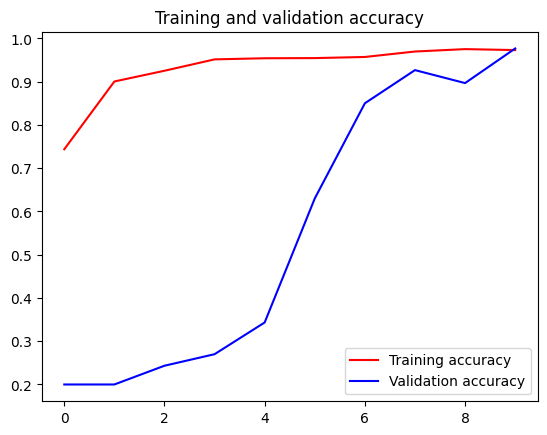

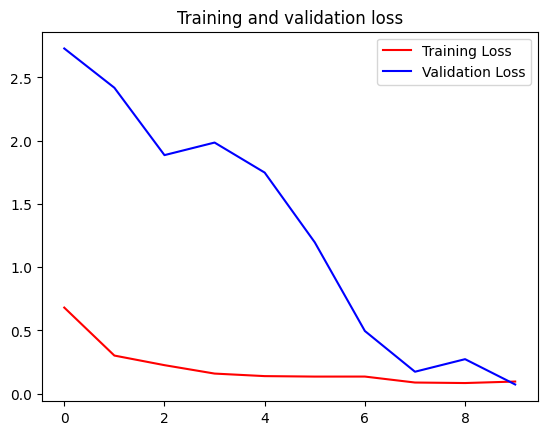

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'

# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

## RESNET 101


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1# Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Load model MobileNet
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)
model_path = 'resnet101_model1.h5'
model.save(model_path)

Found 2700 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
171446536/171446536 [==============================] - 6s 0us/step
Epoch 1/20
169/169 [==============================] - 121s 264ms/step - loss: 0.6999 - accuracy: 0.7459 - val_loss: 3.5118 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/20
169/169 [==============================] - 44s 261ms/step - loss: 0.2734 - accuracy: 0.9059 - val_loss: 10.6667 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 3/20
169/169 [==============================] - 45s 266ms/step - loss: 0.2043 - accuracy: 0.9348 - val_loss: 2.8993 - val_accuracy: 0.2233 - lr: 1.0000e-04
Epoch 4/20
169/169 [==============================] - 40s 235ms/step - loss: 0.1703 - accuracy: 0.9459 - val_loss: 2.2479 - val_accuracy: 0.2733 - lr: 1.0000e-04
Epoch 5/20
169/169 [==============================] - 41s 241ms/step - loss: 0.1297 - accuracy: 0.9581 - val_loss: 1.6429 - val_accuracy: 0.4267 - lr: 1.0000e-04
Epoch 6/20
169/169 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 100 images belonging to 5 classes.
4/4 [==============================] - 1s 194ms/step - loss: 0.6151 - accuracy: 0.8400
Test Loss: 0.6151332259178162
Test Accuracy: 0.8399999737739563
4/4 [==============================] - 2s 142ms/step
Image 1: Predicted class - 4, True class - 4
Image 2: Predicted class - 2, True class - 2
Image 3: Predicted class - 4, True class - 2
Image 4: Predicted class - 1, True class - 0
Image 5: Predicted class - 3, True class - 4
Image 6: Predicted class - 3, True class - 0
Image 7: Predicted class - 1, True class - 2
Image 8: Predicted class - 1, True class - 3
Image 9: Predicted class - 1, True class - 2
Image 10: Predicted class - 3, True class - 2
Image 11: Predicted class - 0, True class - 1
Image 12: Predicted class - 2, True class - 2
Image 13: Predicted class - 2, True class - 4
Image 14: Predicted class - 0, True class - 0
Image 15: Predicted class - 2, True class - 4
Confusion Matrix:
[[6 4 5 1 4]
 [2 6 6 3 3]
 [5 4 3 5 3]
 [7 4 3 2 4]
 [5 

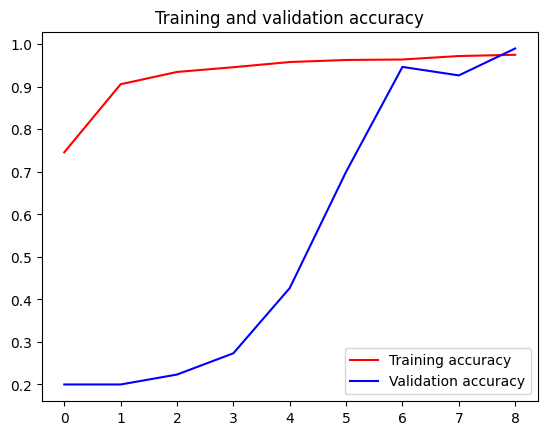

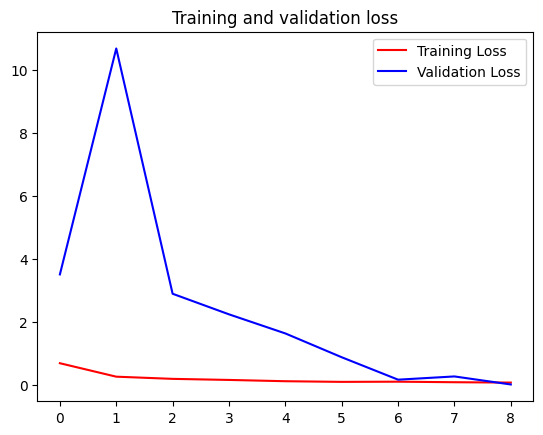

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'

# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1# Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Load model MobileNet
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)
model_path = 'resnet152_model.h5'
model.save(model_path)


Found 2700 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
234698864/234698864 [==============================] - 9s 0us/step
Epoch 1/15
169/169 [==============================] - 158s 327ms/step - loss: 0.7057 - accuracy: 0.7385 - val_loss: 5.9102 - val_accuracy: 0.2100 - lr: 1.0000e-04
Epoch 2/15
169/169 [==============================] - 53s 313ms/step - loss: 0.3161 - accuracy: 0.8974 - val_loss: 2.0957 - val_accuracy: 0.1933 - lr: 1.0000e-04
Epoch 3/15
169/169 [==============================] - 52s 306ms/step - loss: 0.1951 - accuracy: 0.9311 - val_loss: 2.1914 - val_accuracy: 0.1800 - lr: 1.0000e-04
Epoch 4/15
169/169 [==============================] - 51s 304ms/step - loss: 0.1427 - accuracy: 0.9600 - val_loss: 1.6392 - val_accuracy: 0.2433 - lr: 1.0000e-04
Epoch 5/15
169/169 [==============================] - 52s 308ms/step - loss: 0.1274 - accuracy: 0.9578 - val_loss: 1.3096 - val_accuracy: 0.6167 - lr: 1.0000e-04
Epoch 6/15
169/169 [===================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 100 images belonging to 5 classes.
4/4 [==============================] - 1s 114ms/step - loss: 0.5772 - accuracy: 0.8600
Test Loss: 0.5772343277931213
Test Accuracy: 0.8600000143051147
4/4 [==============================] - 4s 185ms/step
Image 1: Predicted class - 3, True class - 2
Image 2: Predicted class - 2, True class - 0
Image 3: Predicted class - 4, True class - 2
Image 4: Predicted class - 4, True class - 0
Image 5: Predicted class - 3, True class - 3
Image 6: Predicted class - 4, True class - 0
Image 7: Predicted class - 2, True class - 1
Image 8: Predicted class - 2, True class - 4
Image 9: Predicted class - 0, True class - 3
Image 10: Predicted class - 4, True class - 2
Image 11: Predicted class - 3, True class - 4
Image 12: Predicted class - 3, True class - 4
Image 13: Predicted class - 1, True class - 4
Image 14: Predicted class - 2, True class - 3
Image 15: Predicted class - 2, True class - 1
Confusion Matrix:
[[9 3 5 1 2]
 [4 1 2 4 9]
 [2 6 3 4 5]
 [4 6 5 2 3]
 [3 

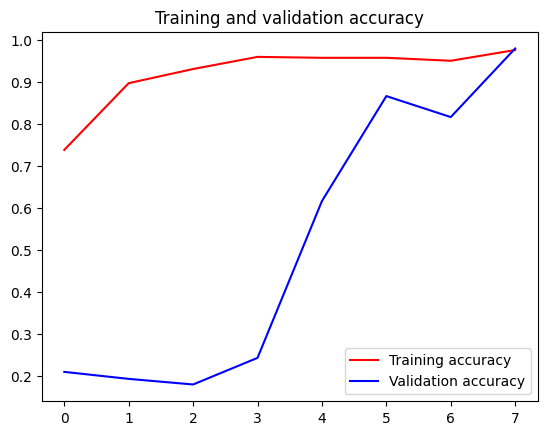

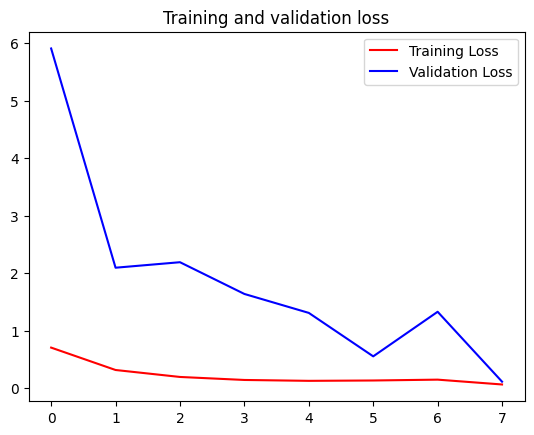

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'

# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

## MOBILE NET


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1# Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Load model MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)
model_path = 'MobileNet_model.h5'
model.save(model_path)


Found 2700 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


17225924/17225924 [==============================] - 1s 0us/step
Epoch 1/15
169/169 [==============================] - 47s 187ms/step - loss: 1.0764 - accuracy: 0.5993 - val_loss: 0.6744 - val_accuracy: 0.7567 - lr: 1.0000e-04
Epoch 2/15
169/169 [==============================] - 34s 204ms/step - loss: 0.5159 - accuracy: 0.8067 - val_loss: 0.4004 - val_accuracy: 0.8533 - lr: 1.0000e-04
Epoch 3/15
169/169 [==============================] - 38s 227ms/step - loss: 0.3730 - accuracy: 0.8570 - val_loss: 0.2221 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 4/15
169/169 [==============================] - 31s 182ms/step - loss: 0.2810 - accuracy: 0.8952 - val_loss: 0.1890 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 5/15
169/169 [==============================] - 31s 181ms/step - loss: 0.1980 - accuracy: 0.9348 - val_loss: 0.1560 - val_accuracy: 0.9333 - lr: 1.0000e-04
Epoch 6/15
169/169 [==============================] - 30s 180ms/step - loss: 0.1755 - accuracy: 0.9374 - val_loss: 0.1297 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 100 images belonging to 5 classes.
4/4 [==============================] - 1s 117ms/step - loss: 1.0508 - accuracy: 0.8000
Test Loss: 1.050785779953003
Test Accuracy: 0.800000011920929
4/4 [==============================] - 1s 99ms/step
Image 1: Predicted class - 3, True class - 2
Image 2: Predicted class - 2, True class - 0
Image 3: Predicted class - 4, True class - 2
Image 4: Predicted class - 4, True class - 0
Image 5: Predicted class - 3, True class - 3
Image 6: Predicted class - 4, True class - 0
Image 7: Predicted class - 2, True class - 1
Image 8: Predicted class - 2, True class - 4
Image 9: Predicted class - 3, True class - 3
Image 10: Predicted class - 4, True class - 2
Image 11: Predicted class - 0, True class - 4
Image 12: Predicted class - 3, True class - 4
Image 13: Predicted class - 1, True class - 4
Image 14: Predicted class - 2, True class - 3
Image 15: Predicted class - 2, True class - 1
Confusion Matrix:
[[7 2 4 4 3]
 [4 1 2 5 8]
 [1 5 2 7 5]
 [3 5 3 4 5]
 [3 5 2

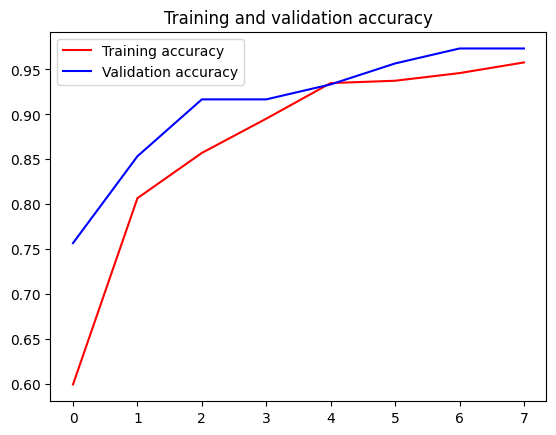

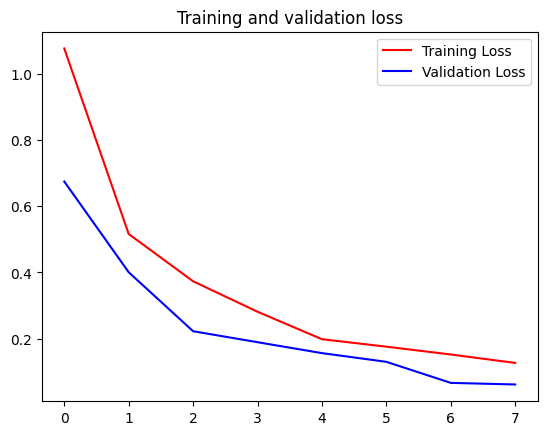

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'

# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

## Part 2

In [ ]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.20.0-py3-none-any.whl (89 kB)
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorflow_decision_forests-1.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1# Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Load model MobileNet
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)
model_path = 'resnet152_model1.h5'
model.save(model_path)


Found 2700 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/15


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 100 images belonging to 5 classes.


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-7-f405bfa3f87f>", line 81, in <cell line: 81>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,4] labels_size=[32,5]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_93152]

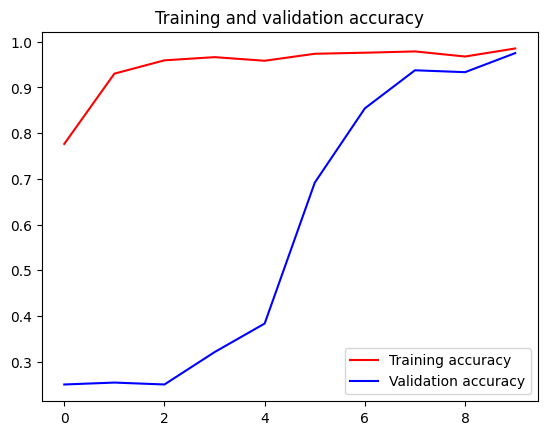

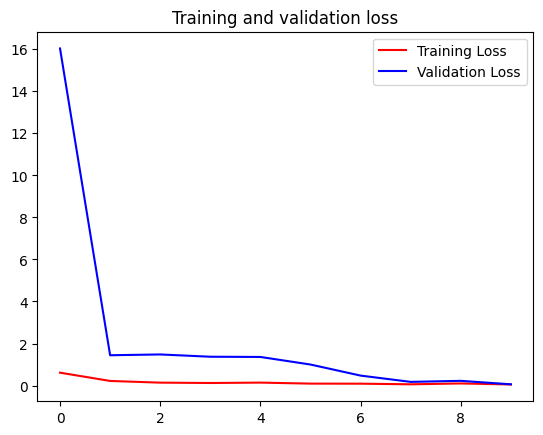

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'

# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
# Convert model to TensorFlow.js format
model_path ='/content/resnet152_model1.h5'
output_directory = '/content/drive/MyDrive/DATASET_FIX'
!tensorflowjs_converter --input_format=keras --output_format=tfjs_graph_model {model_path} {output_directory}

2024-06-18 05:26:10.759949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 05:26:16.796450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-18 05:26:28.185678: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 05:26:28.948134: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

In [ ]:
import os
import zipfile

# Define paths
model_path = '/content/resnet152_model.h5'
output_directory = '/content/drive/MyDrive/DATASET_FIX'
tfjs_output_directory = '/content/drive/MyDrive/DATASET_FIX/tfjs_model'

# Convert model to TensorFlow.js format
!tensorflowjs_converter --input_format=keras --output_format=tfjs_graph_model {model_path} {tfjs_output_directory}

# Zip the output directory
zip_file = os.path.join(output_directory, 'tfjs_model.zip')

with zipfile.ZipFile(zip_file, 'w') as zipf:
    # Recursively add files from tfjs_output_directory into the zip archive
    for root, dirs, files in os.walk(tfjs_output_directory):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), tfjs_output_directory))

# Download the ZIP file
from google.colab import files
files.download(zip_file)


2024-06-18 05:40:02.687807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-18 05:40:05.892639: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Definisikan kelas yang akan digunakan
classes = ['acne_nodules', 'papula_pustula', 'blackhead', 'whitehead']

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  # Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    classes=classes  # Hanya menggunakan kelas yang diinginkan
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42,
    classes=classes  # Hanya menggunakan kelas yang diinginkan
)

# Load model ResNet152
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)  # Menggunakan len(classes) sebagai jumlah kelas
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)

model_path = 'resnet152_model1.h5'
model.save(model_path)


Found 2160 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
234698864/234698864 [==============================] - 10s 0us/step
Epoch 1/15
135/135 [==============================] - 1557s 11s/step - loss: 0.6134 - accuracy: 0.7764 - val_loss: 16.0369 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 2/15
135/135 [==============================] - 41s 301ms/step - loss: 0.2200 - accuracy: 0.9301 - val_loss: 1.4425 - val_accuracy: 0.2542 - lr: 1.0000e-04
Epoch 3/15
135/135 [==============================] - 42s 314ms/step - loss: 0.1391 - accuracy: 0.9593 - val_loss: 1.4805 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/15
135/135 [==============================] - 41s 305ms/step - loss: 0.1222 - accuracy: 0.9662 - val_loss: 1.3720 - val_accuracy: 0.3208 - lr: 1.0000e-04
Epoch 5/15
135/135 [==============================] - 41s 305ms/step - loss: 0.1406 - accuracy: 0.9583 - val_loss: 1.3611 - val_accuracy: 0.3833 - lr: 1.0000e-04
Epoch 6/15
135/135 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 80 images belonging to 4 classes.
3/3 [==============================] - 1s 137ms/step - loss: 0.8716 - accuracy: 0.8125
Test Loss: 0.8716352581977844
Test Accuracy: 0.8125
3/3 [==============================] - 3s 194ms/step
Image 1: Predicted class - 0, True class - 1
Image 2: Predicted class - 2, True class - 1
Image 3: Predicted class - 3, True class - 3
Image 4: Predicted class - 3, True class - 1
Image 5: Predicted class - 0, True class - 1
Image 6: Predicted class - 1, True class - 0
Image 7: Predicted class - 2, True class - 3
Image 8: Predicted class - 2, True class - 3
Image 9: Predicted class - 3, True class - 3
Image 10: Predicted class - 2, True class - 2
Image 11: Predicted class - 3, True class - 0
Image 12: Predicted class - 0, True class - 3
Image 13: Predicted class - 0, True class - 1
Image 14: Predicted class - 0, True class - 1
Image 15: Predicted class - 2, True class - 3
Confusion Matrix:
[[9 4 3 4]
 [7 4 4 5]
 [6 5 4 5]
 [6 3 7 4]]
Classification Report:
 

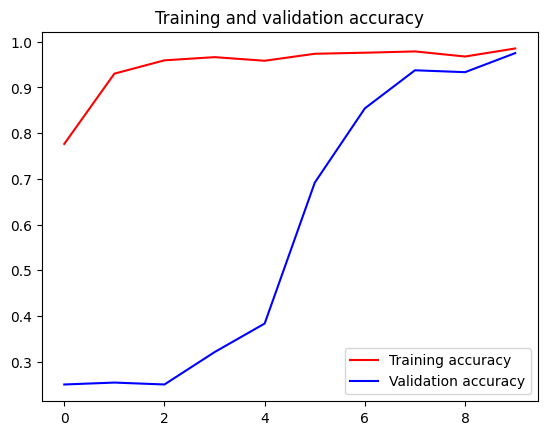

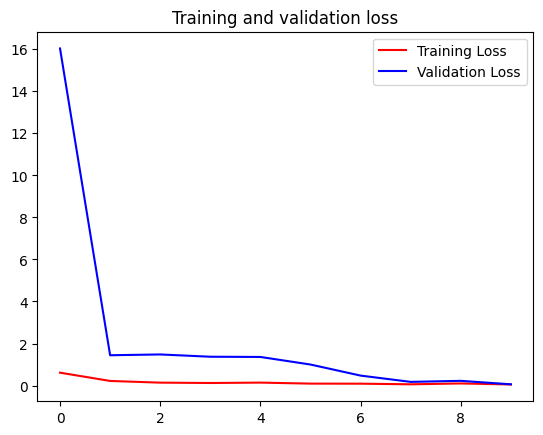

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'
classes = ['acne_nodules', 'papula_pustula', 'blackhead', 'whitehead']
# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    classes=classes,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Path untuk data pelatihan
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'

# Definisikan kelas yang akan digunakan
classes = ['acne_nodules', 'papula_pustula', 'blackhead', 'whitehead']

# Augmentasi data untuk pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  # Set 10% data for validation
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42,
    classes=classes  # Hanya menggunakan kelas yang diinginkan
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42,
    classes=classes  # Hanya menggunakan kelas yang diinginkan
)

# Load model ResNet152
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)  # Menggunakan len(classes) sebagai jumlah kelas
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
custom_callback = CustomCallback()

# Training model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)

model_path = 'resnet152_model1.h5'
model.save(model_path)


Found 2160 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Epoch 1/15
135/135 [==============================] - 143s 304ms/step - loss: 0.6205 - accuracy: 0.7565 - val_loss: 0.4034 - val_accuracy: 0.8708 - lr: 1.0000e-04
Epoch 2/15
135/135 [==============================] - 36s 261ms/step - loss: 0.1843 - accuracy: 0.9338 - val_loss: 0.1656 - val_accuracy: 0.9417 - lr: 1.0000e-04
Epoch 3/15
135/135 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9653
Reached 95% accuracy and val_accuracy, so stopping training!
135/135 [==============================] - 35s 260ms/step - loss: 0.1062 - accuracy: 0.9653 - val_loss: 0.0760 - val_accuracy: 0.9792 - lr: 1.0000e-04


Found 80 images belonging to 4 classes.
3/3 [==============================] - 5s 62ms/step - loss: 0.4530 - accuracy: 0.8750
Test Loss: 0.45295944809913635
Test Accuracy: 0.875
3/3 [==============================] - 3s 118ms/step
Image 1: Predicted class - 0, True class - 3
Image 2: Predicted class - 2, True class - 3
Image 3: Predicted class - 3, True class - 0
Image 4: Predicted class - 1, True class - 3
Image 5: Predicted class - 1, True class - 0
Image 6: Predicted class - 2, True class - 2
Image 7: Predicted class - 0, True class - 2
Image 8: Predicted class - 0, True class - 0
Image 9: Predicted class - 1, True class - 3
Image 10: Predicted class - 3, True class - 2
Image 11: Predicted class - 2, True class - 1
Image 12: Predicted class - 1, True class - 1
Image 13: Predicted class - 2, True class - 2
Image 14: Predicted class - 3, True class - 1
Image 15: Predicted class - 0, True class - 3
Confusion Matrix:
[[7 4 5 4]
 [5 3 8 4]
 [7 2 6 5]
 [4 5 4 7]]
Classification Report:
  

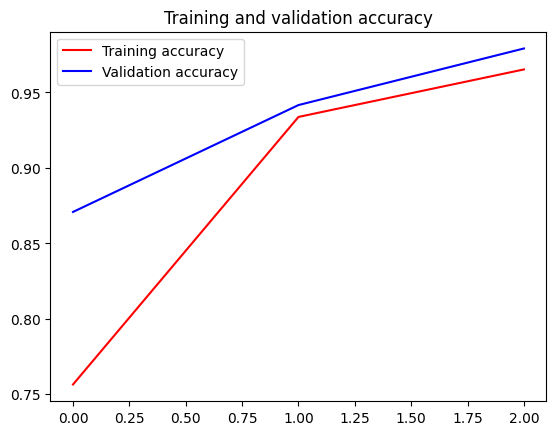

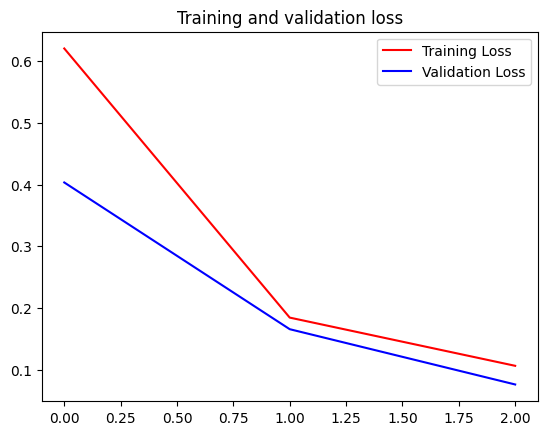

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show



import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Path untuk data pengujian
test_dir = '/content/drive/MyDrive/DATASET_FIX/Test_crop'
classes = ['acne_nodules', 'papula_pustula', 'blackhead', 'whitehead']
# Membuat objek ImageDataGenerator untuk data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    classes=classes,
    class_mode='categorical'
)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Prediksi menggunakan data pengujian
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi secara acak
random_indices = np.random.choice(len(predicted_classes), size=15, replace=False)
for i, idx in enumerate(random_indices):
    print(f'Image {i+1}: Predicted class - {predicted_classes[idx]}, True class - {test_generator.classes[idx]}')

# Menghitung confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung dan mencetak classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Menghitung dan mencetak accuracy score
accuracy = accuracy_score(test_generator.classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Menghitung dan mencetak F1 score
f1 = f1_score(test_generator.classes, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 496.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
 

In [ ]:
pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 743.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependen

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Menggunakan ResNet50 yang lebih sederhana
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2  # Regularisasi L2

# Path untuk data pelatihan (hanya 4 jenis jerawat)
train_dir = '/content/drive/MyDrive/DATASET_FIX/Training_resize'
classes = ['acne_nodules', 'papula_pustula','blackhead','whitehead']

# Augmentasi data untuk pelatihan dengan variasi yang lebih besar
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Meningkatkan split validasi menjadi 20%
)

# Memuat data pelatihan
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,  # Meningkatkan ukuran batch
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=classes,
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    classes=classes,
    seed=42
)

# Load model ResNet50
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Menambahkan layer custom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularisasi L2
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback untuk menghentikan pelatihan saat mencapai akurasi dan val_acc 95%
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nReached 95% accuracy and val_accuracy, so stopping training!")
            self.model.stop_training = True

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-7)
custom_callback = CustomCallback()

# Training model
epochs = 50  # Meningkatkan jumlah epoch
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, reduce_lr, custom_callback]
)

model_path = 'resnet50_model1.h5'
model.save(model_path)

Found 1920 images belonging to 4 classes.
Found 480 images belonging to 4 classes.
58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/50
60/60 [==============================] - 44s 467ms/step - loss: 1.5398 - accuracy: 0.5422 - val_loss: 1.7719 - val_accuracy: 0.2729 - lr: 1.0000e-04
Epoch 2/50
60/60 [==============================] - 28s 458ms/step - loss: 1.1620 - accuracy: 0.6943 - val_loss: 1.6148 - val_accuracy: 0.5917 - lr: 1.0000e-04
Epoch 3/50
60/60 [==============================] - 28s 460ms/step - loss: 1.0094 - accuracy: 0.7484 - val_loss: 1.2780 - val_accuracy: 0.8062 - lr: 1.0000e-04
Epoch 4/50
60/60 [==============================] - 28s 458ms/step - loss: 0.7958 - accuracy: 0.8130 - val_loss: 1.2476 - val_accuracy: 0.5729 - lr: 1.0000e-04
Epoch 5/50
60/60 [==============================] - 29s 478ms/step - loss: 0.7110 - accuracy: 0.8443 - val_loss: 0.8603 - val_accuracy: 0.8667 - lr: 1.0000e-04
Epoch 6/50
60/60 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bff57b2-cd1b-4d31-87b2-4f5483361437' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>